In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from google.colab import files

In [38]:
# Upload file in Colab
uploaded = files.upload()
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# Load dataset with column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=0, names=col_names)


Saving diabetes.csv to diabetes (3).csv
User uploaded file "diabetes (3).csv" with length 23873 bytes


In [39]:
print("\n=== Dataset Info ===")
print("Shape:", pima.shape)
print("\nFirst 5 rows:")
print(pima.head())
print("\nMissing values check:")
print(pima.isnull().sum())


=== Dataset Info ===
Shape: (768, 9)

First 5 rows:
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

Missing values check:
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [41]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols]
y = pima.label

# Standardize features (critical for PCA)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [42]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

print("\n=== PCA RESULTS ===")
print("Explained variance ratio per component:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

# Create DataFrame for PCA features
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = y.reset_index(drop=True)

print("\nFirst 5 rows of PCA-transformed data:")
print(pca_df.head())


=== PCA RESULTS ===
Explained variance ratio per component: [0.27442381 0.21465747 0.14141661]
Total variance explained: 0.6304978872205191

First 5 rows of PCA-transformed data:
        PC1       PC2       PC3  label
0  1.366534  0.929219 -0.382551      1
1 -1.512943  0.403936  0.387678      0
2  0.780532  0.716582 -1.527158      1
3 -1.683661 -0.293480  0.567386      0
4  0.972464 -3.422467 -2.448561      1


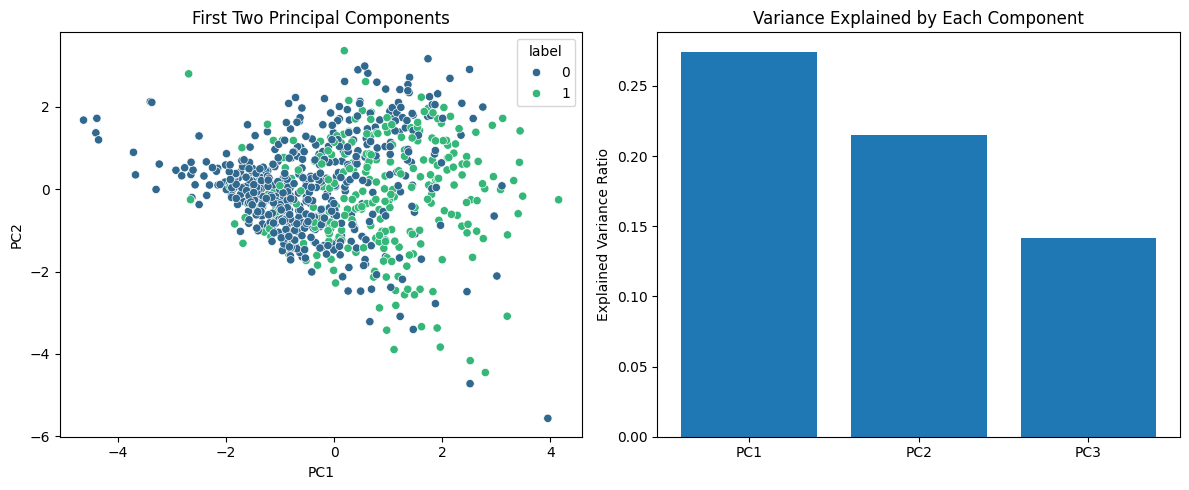

In [43]:
# Visualize PCA components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='viridis')
plt.title('First Two Principal Components')

plt.subplot(1, 2, 2)
plt.bar(['PC1', 'PC2', 'PC3'], pca.explained_variance_ratio_)
plt.title('Variance Explained by Each Component')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()


In [44]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_pca, y, test_size=0.2, random_state=42)

model_pca = LogisticRegression(solver='lbfgs', max_iter=1000)
model_pca.fit(x_train_pca, y_train_pca)


LogisticRegression(max_iter=1000)


=== MODEL PERFORMANCE WITH PCA ===
Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        99
           1       0.63      0.53      0.57        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.71       154



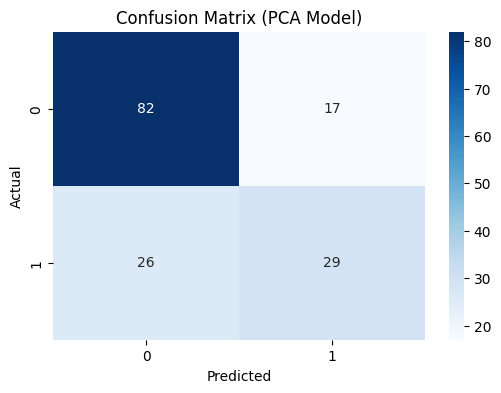

In [46]:
y_pred_pca = model_pca.predict(x_test_pca)

print("\n=== MODEL PERFORMANCE WITH PCA ===")
print("Accuracy:", metrics.accuracy_score(y_test_pca, y_pred_pca))
print("Classification Report:\n", metrics.classification_report(y_test_pca, y_pred_pca))

# Confusion Matrix for PCA model
conf_mat_pca = pd.crosstab(y_test_pca, y_pred_pca,
                          rownames=['Actual'],
                          colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (PCA Model)')
plt.show()

In [47]:
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42)

model_orig = LogisticRegression(solver='lbfgs', max_iter=1000)
model_orig.fit(x_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(x_test_orig)

print("\n=== MODEL PERFORMANCE WITHOUT PCA ===")
print("Accuracy:", metrics.accuracy_score(y_test_orig, y_pred_orig))
print("Classification Report:\n", metrics.classification_report(y_test_orig, y_pred_orig))



=== MODEL PERFORMANCE WITHOUT PCA ===
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [48]:
print("\n=== FINAL COMPARISON ===")
results = pd.DataFrame({
    'Model': ['With PCA (3 components)', 'Without PCA'],
    'Accuracy': [
        metrics.accuracy_score(y_test_pca, y_pred_pca),
        metrics.accuracy_score(y_test_orig, y_pred_orig)
    ],
    'Features Used': [3, x.shape[1]]
})

print(results)


=== FINAL COMPARISON ===
                     Model  Accuracy  Features Used
0  With PCA (3 components)  0.720779              3
1              Without PCA  0.753247              7
